데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


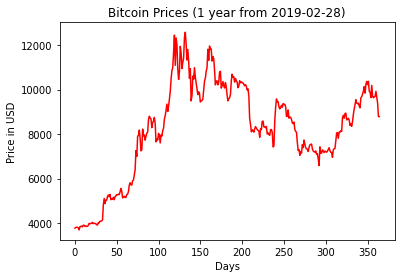

In [6]:
# 비트코인 가격 데이터 읽기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('C:/my_study_python_work_space/ML_project/ai_/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()


In [7]:
# 1년치 비트코인 가격 데이터를 윈도우로 자르기

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  RequestsDependencyWarning)


Epoch 1/200
250/250 - 2s - loss: 1223.2375 - mae: 1223.2375 - val_loss: 469.1622 - val_mae: 469.1622 - 2s/epoch - 7ms/step
Epoch 2/200
250/250 - 1s - loss: 469.5179 - mae: 469.5179 - val_loss: 330.6762 - val_mae: 330.6762 - 608ms/epoch - 2ms/step
Epoch 3/200
250/250 - 1s - loss: 466.8895 - mae: 466.8895 - val_loss: 735.2050 - val_mae: 735.2050 - 669ms/epoch - 3ms/step
Epoch 4/200
250/250 - 1s - loss: 462.8421 - mae: 462.8421 - val_loss: 291.3057 - val_mae: 291.3057 - 655ms/epoch - 3ms/step
Epoch 5/200
250/250 - 1s - loss: 472.2785 - mae: 472.2785 - val_loss: 860.3667 - val_mae: 860.3667 - 629ms/epoch - 3ms/step
Epoch 6/200
250/250 - 1s - loss: 505.9124 - mae: 505.9124 - val_loss: 489.6664 - val_mae: 489.6664 - 609ms/epoch - 2ms/step
Epoch 7/200
250/250 - 1s - loss: 458.8476 - mae: 458.8476 - val_loss: 343.5075 - val_mae: 343.5075 - 706ms/epoch - 3ms/step
Epoch 8/200
250/250 - 1s - loss: 443.2730 - mae: 443.2730 - val_loss: 330.0606 - val_mae: 330.0606 - 706ms/epoch - 3ms/step
Epoch 9/2

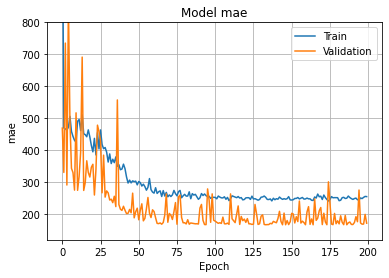

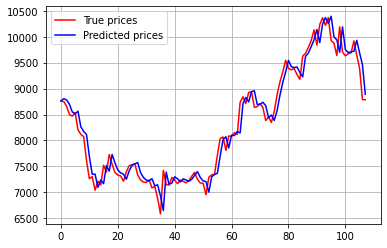

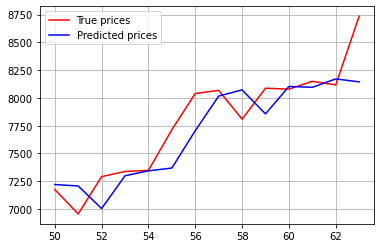

In [8]:
# LSTM을 이용한 비트코인 가격 예측


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open('C:/my_study_python_work_space/ML_project/ai_/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv',"r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 2s - loss: 1154.2354 - mae: 1154.2354 - val_loss: 398.3317 - val_mae: 398.3317 - 2s/epoch - 9ms/step
Epoch 2/200
250/250 - 1s - loss: 567.8151 - mae: 567.8151 - val_loss: 329.2349 - val_mae: 329.2349 - 974ms/epoch - 4ms/step
Epoch 3/200
250/250 - 1s - loss: 673.3329 - mae: 673.3329 - val_loss: 555.0407 - val_mae: 555.0407 - 1s/epoch - 4ms/step
Epoch 4/200
250/250 - 1s - loss: 517.6884 - mae: 517.6884 - val_loss: 312.9655 - val_mae: 312.9655 - 1s/epoch - 4ms/step
Epoch 5/200
250/25

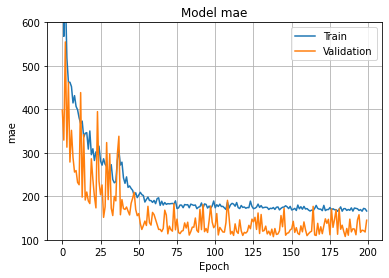

In [9]:
# 다중 채널 비트코인 가격 예측

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open('C:/my_study_python_work_space/ML_project/ai_/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv',"r")
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() # 종가, 시가, 고가, 저가를 모두 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [10]:
# 텐서플로가 제공하는 IMDB 데이터 살펴보기

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)
print(x_train.shape,x_test.shape)
print(x_train[0])

# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id=imdb.get_word_index()
id2word={word:id for id,word in word2id.items()}

for i in range(1,21):
    print(id2word[i],end='/')
    

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 

Epoch 1/20
391/391 - 5s - loss: 0.4298 - accuracy: 0.7722 - val_loss: 0.2804 - val_accuracy: 0.8820 - 5s/epoch - 13ms/step
Epoch 2/20
391/391 - 4s - loss: 0.1673 - accuracy: 0.9377 - val_loss: 0.3031 - val_accuracy: 0.8748 - 4s/epoch - 10ms/step
Epoch 3/20
391/391 - 4s - loss: 0.0633 - accuracy: 0.9827 - val_loss: 0.3660 - val_accuracy: 0.8705 - 4s/epoch - 9ms/step
Epoch 4/20
391/391 - 4s - loss: 0.0169 - accuracy: 0.9972 - val_loss: 0.4248 - val_accuracy: 0.8688 - 4s/epoch - 9ms/step
Epoch 5/20
391/391 - 4s - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.4770 - val_accuracy: 0.8686 - 4s/epoch - 9ms/step
Epoch 6/20
391/391 - 4s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.5112 - val_accuracy: 0.8693 - 4s/epoch - 9ms/step
Epoch 7/20
391/391 - 4s - loss: 8.6468e-04 - accuracy: 1.0000 - val_loss: 0.5383 - val_accuracy: 0.8700 - 4s/epoch - 9ms/step
Epoch 8/20
391/391 - 4s - loss: 5.5238e-04 - accuracy: 1.0000 - val_loss: 0.5622 - val_accuracy: 0.8690 - 4s/epoch - 9ms/step
Epoch 9/20
391

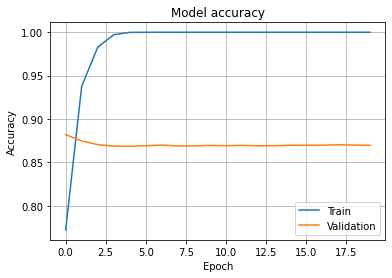

In [11]:
# 단어 임베딩을 사용해 IMDB 데이터를 부정/긍정 평가로 분류하는 학습 모델


embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

# 신경망 모델 설계와 학습
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),verbose=2)

embed.summary()

# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

Epoch 1/20
313/313 - 83s - loss: 0.4596 - accuracy: 0.7685 - val_loss: 0.3099 - val_accuracy: 0.8746 - 83s/epoch - 264ms/step
Epoch 2/20
313/313 - 91s - loss: 0.2480 - accuracy: 0.9043 - val_loss: 0.2908 - val_accuracy: 0.8764 - 91s/epoch - 291ms/step
Epoch 3/20
313/313 - 96s - loss: 0.1840 - accuracy: 0.9331 - val_loss: 0.3209 - val_accuracy: 0.8578 - 96s/epoch - 307ms/step
Epoch 4/20
313/313 - 84s - loss: 0.1504 - accuracy: 0.9462 - val_loss: 0.3960 - val_accuracy: 0.8646 - 84s/epoch - 269ms/step
Epoch 5/20
313/313 - 84s - loss: 0.1165 - accuracy: 0.9598 - val_loss: 0.3727 - val_accuracy: 0.8822 - 84s/epoch - 268ms/step
Epoch 6/20
313/313 - 84s - loss: 0.1082 - accuracy: 0.9634 - val_loss: 0.3622 - val_accuracy: 0.8724 - 84s/epoch - 267ms/step
Epoch 7/20
313/313 - 82s - loss: 0.0824 - accuracy: 0.9729 - val_loss: 0.4215 - val_accuracy: 0.8744 - 82s/epoch - 263ms/step
Epoch 8/20
313/313 - 87s - loss: 0.0744 - accuracy: 0.9759 - val_loss: 0.4231 - val_accuracy: 0.8576 - 87s/epoch - 278

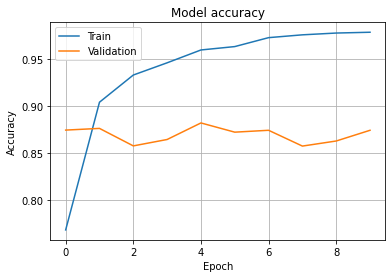

In [12]:
# 워드 임베딩을 사용하여 IMDB 데이터를 부정/긍정 평가로 분류하는 LSTM 신경망 학습


from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

dic_siz=10000 # 사전의 크기(사전에 있는 단어 개수)
sample_siz=512 # 샘플의 크기

# tensorflow가 제공하는 간소한 버전의 IMDB 읽기
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=dic_siz)

embed_space_dim=16 # 16차원의 임베딩 공간

x_train=preprocessing.sequence.pad_sequences(x_train,maxlen=sample_siz)
x_test=preprocessing.sequence.pad_sequences(x_test,maxlen=sample_siz)

early=EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True)

# 신경망 모델의 설계와 학습(LSTM 층 포함)
embed=Sequential()
embed.add(Embedding(input_dim=dic_siz,output_dim=embed_space_dim,input_length=sample_siz))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
hist=embed.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,verbose=2,callbacks=[early])

# 모델 평가
res=embed.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 학습 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()